In [23]:
fig_prefix = "../figures/2018-08-30_jw-kron_benchmark_test_"

In [24]:
import unittest

from kronprod import *
import pandas as pd
import seaborn as sns
import time
import numpy as np
import matplotlib as pyplot

In [25]:
# took ~150 seconds
def benchMarkTest(n,p):
    r_As = [np.identity(p) for i in range(n)]
    As = [m/m.sum(axis=1)[:,None] for m in r_As] # normalize each row
    x = np.random.rand(p**n)
    kp = KronProd(list(reversed(As)), x)
    kp.tensorProd()
    return kp.Y

In [26]:
MAX_TIME = 10
DEFAULT_N = 4
DEFAULT_P = 10

## Tests

In [27]:
#Test N
n = 1
n_results = []
n_kp = []
while(1):
    start_time = time.time()
    results = benchMarkTest(n,DEFAULT_P)
    test_time = time.time() -start_time
    n_results.append( (n,test_time) )
    n_kp.append(results)
    if(test_time > MAX_TIME):
        break
    n += 1

In [28]:
#Test P
p = 1
p_results = []
p_kp = []
while(1):
    start_time = time.time()
    results = benchMarkTest(DEFAULT_N,p)
    test_time = time.time() -start_time
    p_results.append( (p,test_time) )
    p_kp.append(results)
    if(test_time > MAX_TIME):
        break
    p += 2

## Results


In [29]:
print n_results

[(1, 0.00043010711669921875), (2, 0.0023851394653320312), (3, 0.0287930965423584), (4, 0.1498110294342041), (5, 1.8347041606903076), (6, 23.14154291152954)]


In [30]:
print p_results

[(1, 0.00023698806762695312), (3, 0.0016078948974609375), (5, 0.005743980407714844), (7, 0.025745868682861328), (9, 0.09165811538696289), (11, 0.24297094345092773), (13, 0.5411698818206787), (15, 1.0880589485168457), (17, 2.0466530323028564), (19, 3.5084381103515625), (21, 5.728636026382446), (23, 9.089586973190308), (25, 13.715835094451904)]


In [31]:
print n_kp

[array([0.94741469, 0.95438977, 0.44533619, 0.70601914, 0.57518996,
       0.02403044, 0.4686504 , 0.44471541, 0.60135477, 0.26511396]), array([0.61784912, 0.19600339, 0.55334688, 0.8428151 , 0.6951856 ,
       0.80418217, 0.37095072, 0.1348607 , 0.40891406, 0.22282577,
       0.72763107, 0.88666944, 0.90948707, 0.82110484, 0.72069454,
       0.37325198, 0.6684777 , 0.20929518, 0.23289616, 0.40853464,
       0.39051638, 0.16422951, 0.86098149, 0.7463342 , 0.07547642,
       0.86655831, 0.26717759, 0.02122861, 0.06937744, 0.85114632,
       0.33878357, 0.02340297, 0.59074849, 0.77744828, 0.59006433,
       0.00641223, 0.37345621, 0.91865964, 0.68036572, 0.99127892,
       0.64819156, 0.88860932, 0.96252134, 0.77328287, 0.87634073,
       0.61286859, 0.71867046, 0.22679303, 0.27301687, 0.10004285,
       0.45855395, 0.06990304, 0.0778144 , 0.70078379, 0.28067771,
       0.89532494, 0.94017807, 0.97669915, 0.92957306, 0.90882721,
       0.120553  , 0.49022781, 0.82449184, 0.92702067, 0.88

In [32]:
print p_kp

[array([0.81031578]), array([0.54892751, 0.93148735, 0.58904468, 0.18156348, 0.53611576,
       0.21690294, 0.00206238, 0.31679307, 0.714611  , 0.20634974,
       0.10699394, 0.64699063, 0.68526749, 0.07463748, 0.52733752,
       0.51273816, 0.99828011, 0.77549702, 0.3064231 , 0.07095886,
       0.67620868, 0.55235992, 0.27735751, 0.71358605, 0.27037816,
       0.70764451, 0.76189004, 0.972936  , 0.08719971, 0.99112895,
       0.66628475, 0.71335033, 0.42832226, 0.8061373 , 0.40413858,
       0.54607948, 0.55504745, 0.40152859, 0.94388521, 0.93106585,
       0.41562249, 0.95717698, 0.05723274, 0.09750694, 0.57720741,
       0.46586401, 0.59169721, 0.83340319, 0.58711642, 0.56421626,
       0.05542988, 0.87909986, 0.10819042, 0.57705941, 0.83789302,
       0.27203302, 0.97114158, 0.09895455, 0.76109689, 0.61671601,
       0.03269269, 0.03378533, 0.19782428, 0.38400582, 0.89577451,
       0.33194177, 0.20082611, 0.29449548, 0.64789706, 0.51105617,
       0.35219166, 0.24874606, 0.590398 

In [33]:
df_n = pd.DataFrame(n_results, columns=['n', 'seconds'])
df_n['log(seconds)'] = np.log(df_n['seconds'])
df_n

,n,seconds,log(seconds)
0,1,0.000430,-7.751476
1,2,0.002385,-6.038498
2,3,0.028793,-3.547620
3,4,0.149811,-1.898381
4,5,1.834704,0.606883
5,6,23.141543,3.141629


In [34]:
df_p = pd.DataFrame(p_results, columns=['p', 'seconds'])
df_p['log(seconds)'] = np.log(df_p['seconds'])
df_p

,p,seconds,log(seconds)
0,1,0.000237,-8.347501
1,3,0.001608,-6.432829
2,5,0.005744,-5.159603
3,7,0.025746,-3.659481
4,9,0.091658,-2.389690
5,11,0.242971,-1.414813
6,13,0.541170,-0.614022
7,15,1.088059,0.084395
8,17,2.046653,0.716206
9,19,3.508438,1.255171


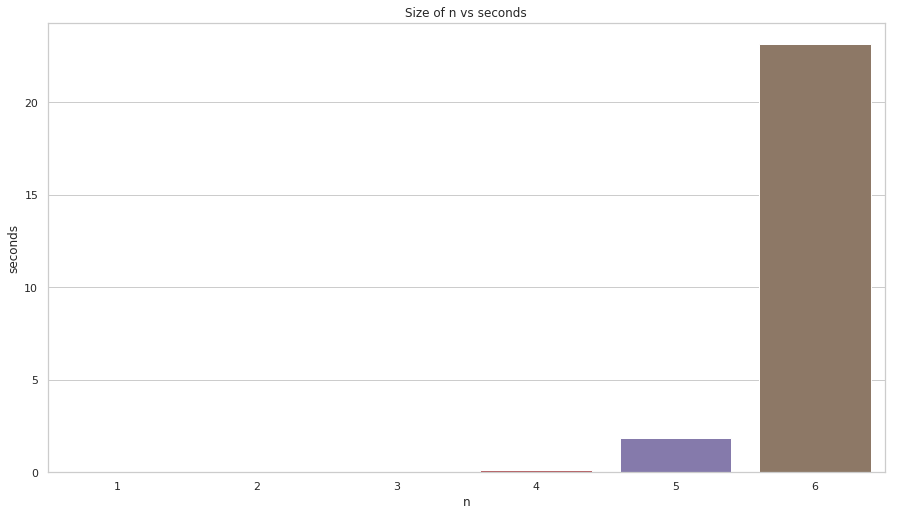

In [35]:
#Create appropiate figure
sns.set(style="whitegrid")
ax = sns.barplot(x=df_n['n'], y=df_n['seconds'], data=df_n).set_title('Size of n vs seconds')
ax.figure.savefig(fig_prefix + "seconds_for_completion_n")

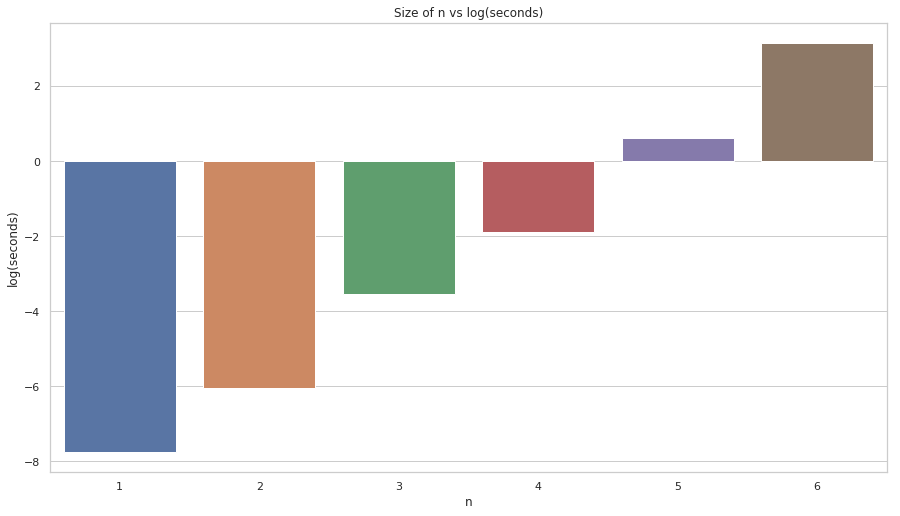

In [36]:
#Create appropiate figure
sns.set(style="whitegrid")
ax = sns.barplot(x=df_n['n'], y=df_n['log(seconds)'], data=df_n).set_title('Size of n vs log(seconds)')
ax.figure.savefig(fig_prefix + "log_seconds_for_completion_n")

In [37]:
#resample data 
df_p2 = df_p[::1]

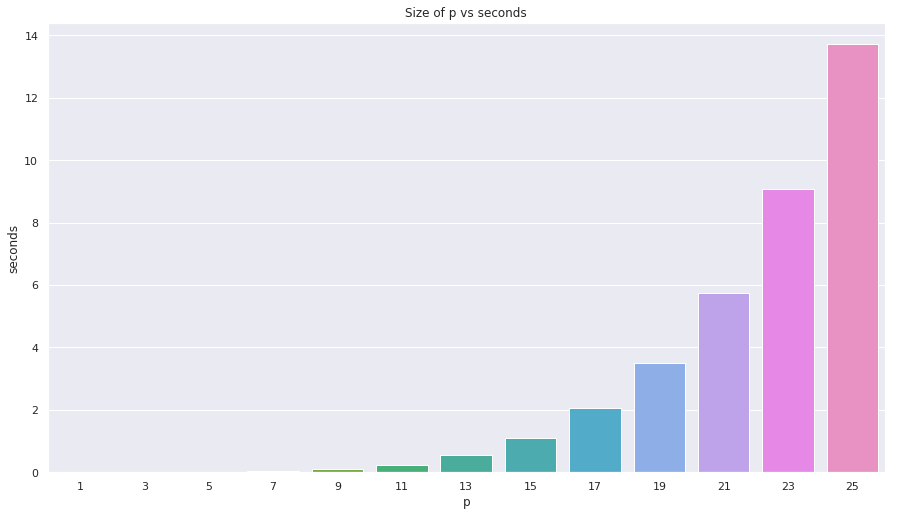

In [38]:
#Create appropiate figure

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.barplot(x=df_p2['p'], y=df_p2['seconds'], data=df_p2).set_title('Size of p vs seconds')
ax.figure.savefig(fig_prefix + "seconds_for_completion_p")


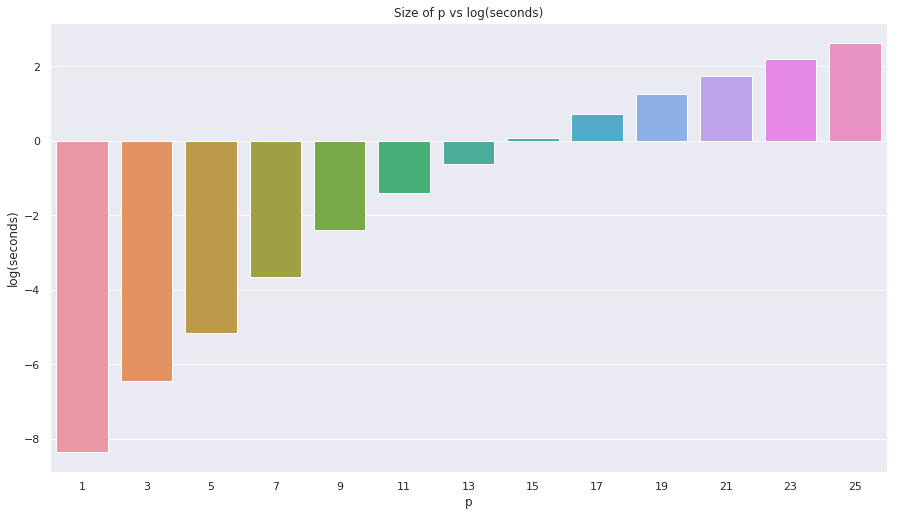

In [39]:
#Create appropiate figure
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.barplot(x=df_p2['p'], y=df_p2['log(seconds)'], data=df_p2).set_title('Size of p vs log(seconds)')
ax.figure.savefig(fig_prefix + "log_seconds_for_completion_p")

## Create benchmark for sparse

In [40]:
from kronprod_sparse import benchmarkTestSparse

In [41]:
#Test N
n = 1
n_results = []
n_kp = []
while(1):
    start_time = time.time()
    results = benchmarkTestSparse(n,DEFAULT_P)
    test_time = time.time() -start_time
    n_results.append( (n,test_time) )
    n_kp.append(results)
    if(test_time > MAX_TIME):
        break
    n += 1

Shape is 10
Shape is 100
Shape is 1000
Shape is 10000
Shape is 100000


In [42]:
#Test P
p = 1
p_results = []
p_kp = []
while(1):
    start_time = time.time()
    results = benchmarkTestSparse(DEFAULT_N,p)
    test_time = time.time() -start_time
    p_results.append( (p,test_time) )
    p_kp.append(results)
    if(test_time > MAX_TIME):
        break
    p += 2

Shape is 1
Shape is 81
Shape is 625
Shape is 2401
Shape is 6561
Shape is 14641
Shape is 28561
Shape is 50625
Shape is 83521


In [43]:
df_n = pd.DataFrame(n_results, columns=['n', 'seconds'])
df_n['log(seconds)'] = np.log(df_n['seconds'])
df_n

,n,seconds,log(seconds)
0,1,0.003136,-5.764757
1,2,0.030849,-3.478652
2,3,0.191353,-1.653635
3,4,1.876168,0.629231
4,5,22.755714,3.124816


In [44]:
df_p = pd.DataFrame(p_results, columns=['p', 'seconds'])
df_p['log(seconds)'] = np.log(df_p['seconds'])
df_p

,p,seconds,log(seconds)
0,1,0.001867,-6.283520
1,3,0.020261,-3.899067
2,5,0.131069,-2.032032
3,7,0.513722,-0.666073
4,9,1.322856,0.279793
5,11,2.790747,1.026309
6,13,5.275720,1.663115
7,15,9.811064,2.283511
8,17,15.501662,2.740947
